In [22]:
from QRReader import QRReader
import cv2
import IPython
from io import BytesIO
from PIL import Image
import copy
# show images on jupyter
def show_image_on_jupyter(frame, fmt='jpeg', clear=False):
    if clear:
        IPython.display.clear_output(wait=True)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # (2)
    f = BytesIO()
    Image.fromarray(frame).save(f, fmt)  # (3)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))  # (4)


def show_qr(img,data,points):
    if data:
        img=copy.deepcopy(img)
        for s, p in zip(data, points):
            if s:
                color = (0, 255, 0)
            else:
                color = (0, 0, 255)
            img= cv2.polylines(img, [p.astype(int)], True, color, 8)
            img = cv2.putText(img, s, p[0].astype(int),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        show_image_on_jupyter(img,clear=True)

In [23]:
qr=QRReader("model/")
img = cv2.imread("img.jpg")

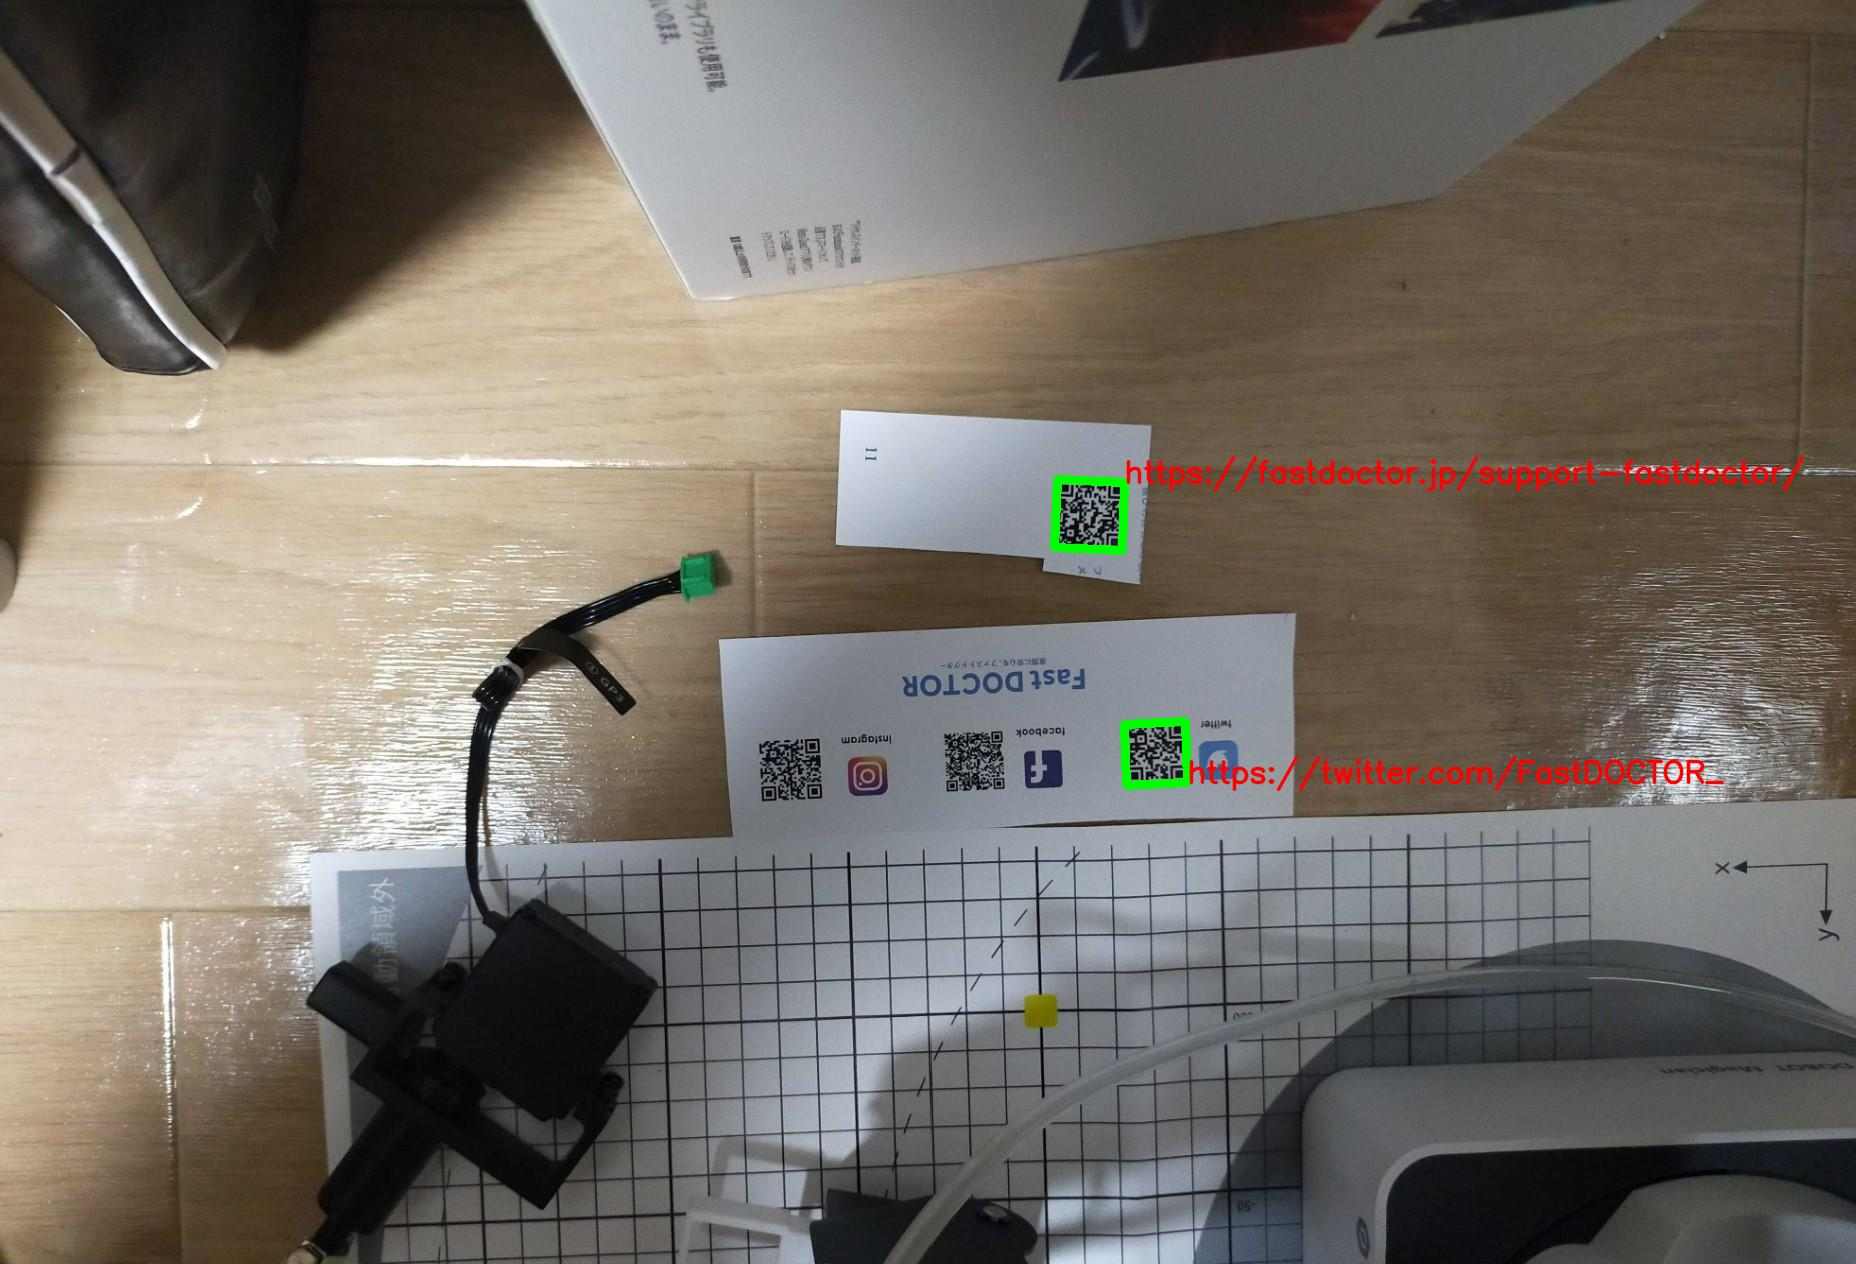

['https://twitter.com/FastDOCTOR_',
 'https://fastdoctor.jp/support-fastdoctor/']

In [25]:
# normal recognition
data, points = qr.read(img, n=1)
show_qr(img,data,points)
data

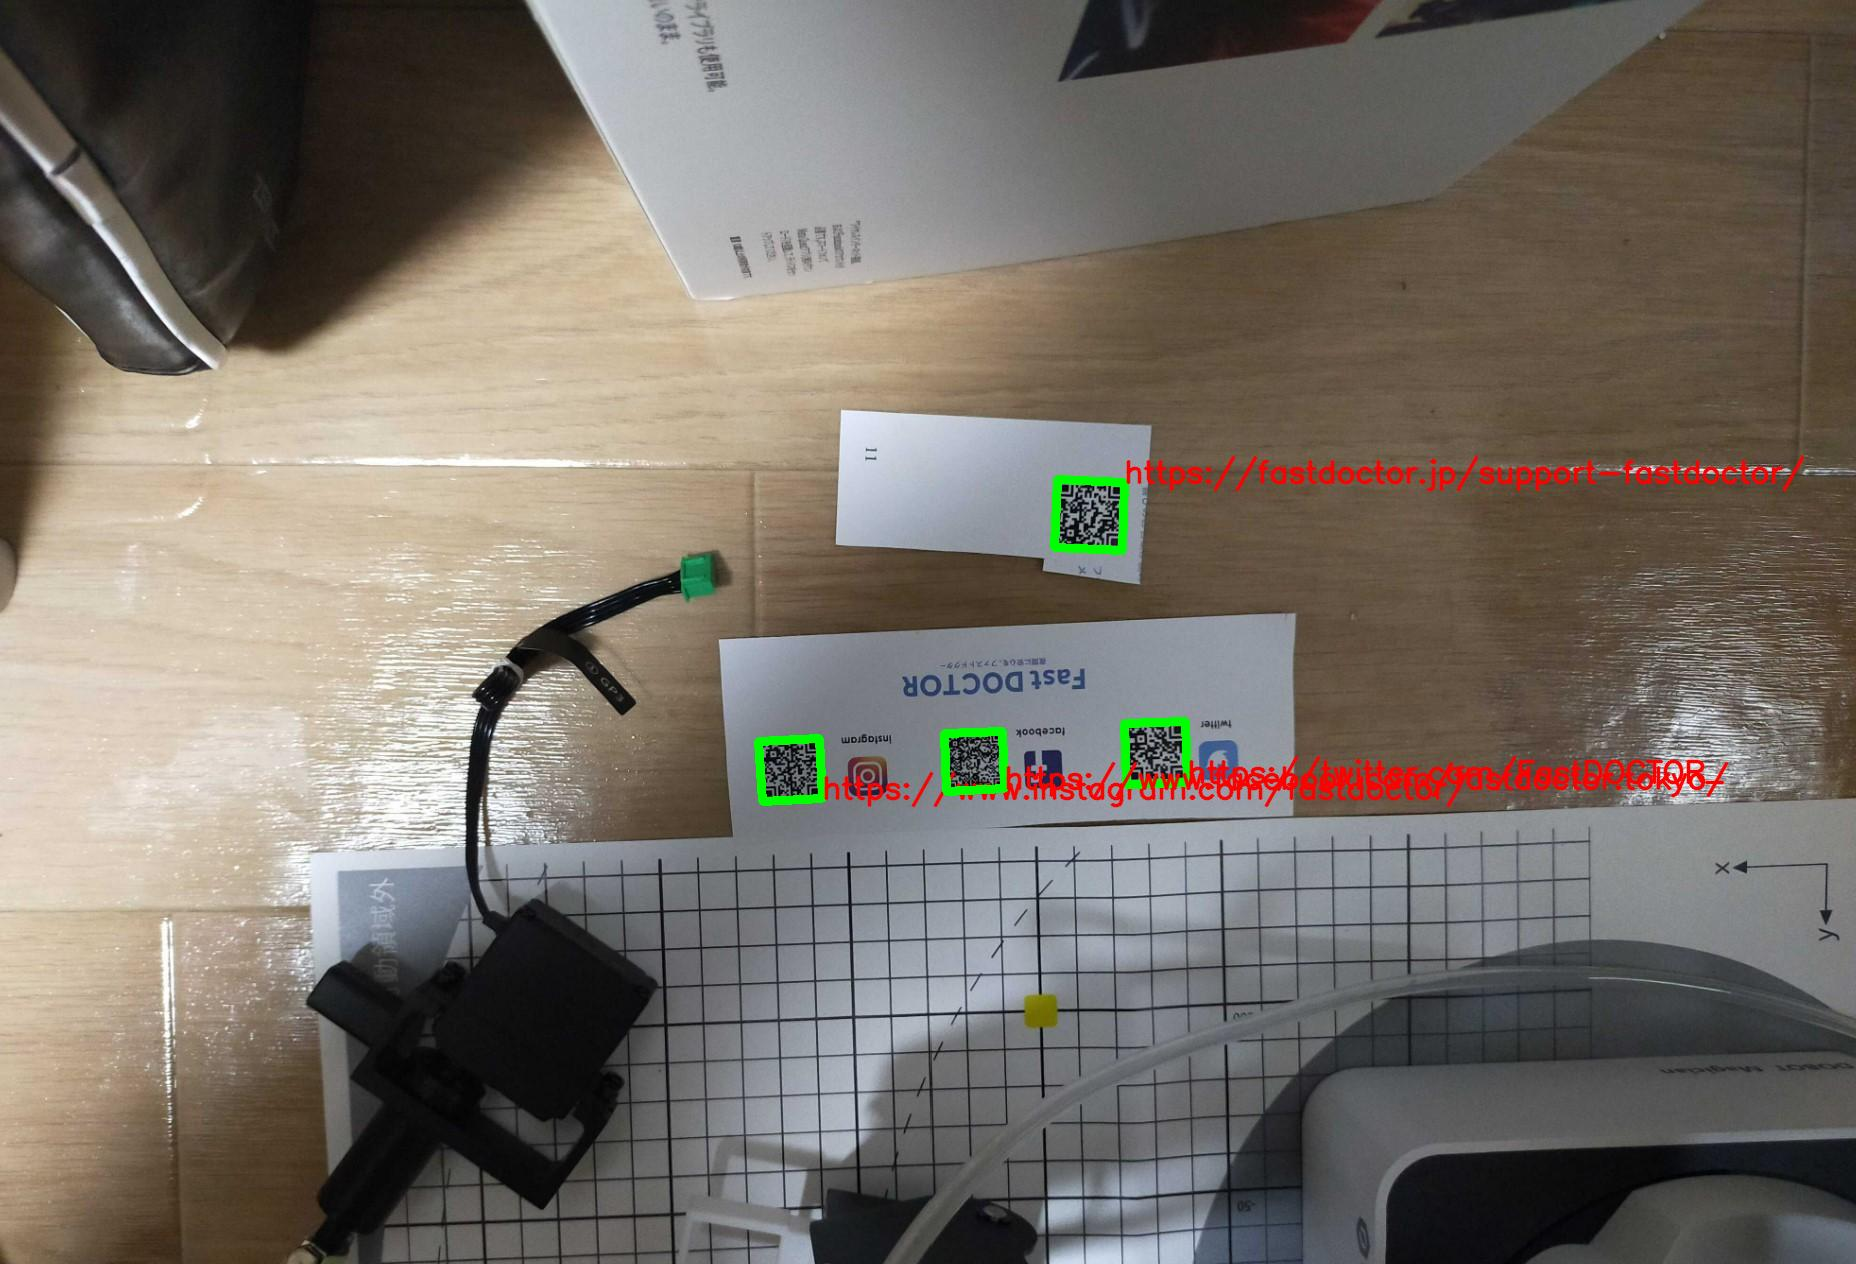

['https://fastdoctor.jp/support-fastdoctor/',
 'https://www.instagram.com/fastdoctor/',
 'https://twitter.com/FastDOCTOR_',
 'https://www.facebook.com/fastdoctor.tokyo/']

In [27]:
# split recognition
data, points = qr.read(img, n=2)
show_qr(img,data,points)
data